In [308]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import pandas as pd
from path import Path

from typing import Dict, List

from scipy.sparse import hstack

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [167]:
%matplotlib inline

In [250]:
data_directory = Path("data")

dset_path = "clean_2017-2019.csv"
dset1_imputed_path = "imputed_data_r1.csv"
dset2_imputed_path = "imputed_data_r2.csv"

dset = pd.read_csv(data_directory / dset_path)

In [251]:
dset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age,country_live,country_work,emp_mh_resources,ever_diagnosed,family_history,gender,...,primarily_tech,primary_role_tech,race,reveal_to_clients,self-employed,share_with_f&f,sought_treatment,state_live,state_work,year
0,0,0,0,27.0,United Kingdom,United Kingdom,I don't know,NaN,No,F,...,True,1.0,NaN,NaN,0,5,1,NaN,NaN,2017.0
1,1,1,1,31.0,United Kingdom,United Kingdom,No,NaN,No,M,...,True,1.0,NaN,NaN,0,4,0,NaN,NaN,2017.0
2,2,2,2,36.0,United States of America,United States of America,No,Yes,Yes,M,...,True,1.0,White,NaN,0,5,1,Missouri,Missouri,2017.0
3,3,3,3,22.0,United States of America,United States of America,I don't know,Yes,I don't know,M,...,True,1.0,White,NaN,0,10,1,Washington,Washington,2017.0
4,4,4,4,52.0,United States of America,United States of America,NaN,NaN,Yes,F,...,NaN,NaN,More than one,"Sometimes, if it comes up",1,10,1,Illinois,Illinois,2017.0


In [254]:
# Finding out how many seek treatment
dset.groupby('sought_treatment')['sought_treatment'].count()
# dset.groupby('ever_diagnosed')['ever_diagnosed'].count()

sought_treatment
0    589
1    936
Name: sought_treatment, dtype: int64

In [263]:
dset = dset[pd.notna(dset['gender'])]
dset = dset[pd.notna(dset['race'])]

In [300]:
def feature_dict_of_entry(entry) -> Dict:
    # DictVectorizer automatically turns strings into one-hot encodings (so we do not have to do so for categorical variables like country).
    entry = entry[1]
    return {
        "age" : entry['age'],
        "country" : entry["country_live"],
        "gender" : entry["gender"], 
    }

X = list(map(feature_dict_of_entry, dset.iterrows()))
y = [entry[1]['sought_treatment'] for entry in dset.iterrows()]

In [301]:
TRAIN_PROPORTION = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_PROPORTION, random_state=42)

In [302]:
dv = DictVectorizer()
train_feature_set = dv.fit_transform(X_train)
test_feature_set = dv.transform(X_test)

In [303]:
lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
lr.fit(train_feature_set, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
test_pred_y = lr.predict(test_feature_set)

In [305]:
accuracy = accuracy_score(y_test, test_pred_y)
f1 = f1_score(y_test, test_pred_y)

print(f"Accuracy score: {round(accuracy, 3)}")
print(f"F1 score: {round(f1, 3)}\n")

target_names = ["Did not Seek Treatment", "Sought Treatment"]
report = classification_report(y_test, test_pred_y, target_names=target_names)
print(report)

Accuracy score: 0.726
F1 score: 0.841

                        precision    recall  f1-score   support

Did not Seek Treatment       0.00      0.00      0.00        52
      Sought Treatment       0.73      1.00      0.84       138

              accuracy                           0.73       190
             macro avg       0.36      0.50      0.42       190
          weighted avg       0.53      0.73      0.61       190



In [274]:
def feature_dict_of_entry2(entry) -> Dict:
    # DictVectorizer automatically turns strings into one-hot encodings (so we do not have to do so for categorical variables like country).
    entry = entry[1]
    return {
        "age" : entry['age'],
        "country" : entry["country_live"],
        "gender" : entry["gender"], 
        "race" : entry["race"],
        "family_history" : entry["family_history"]
    }

X = list(map(feature_dict_of_entry2, dset.iterrows()))
y = [entry[1]['sought_treatment'] for entry in dset.iterrows()]

In [275]:
TRAIN_PROPORTION = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_PROPORTION, random_state=42)

In [276]:
dv = DictVectorizer()
train_feature_set = dv.fit_transform(X_train)
test_feature_set = dv.transform(X_test)

In [277]:
lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
lr.fit(train_feature_set, y_train)
test_pred_y = lr.predict(test_feature_set)

In [278]:
accuracy = accuracy_score(y_test, test_pred_y)
f1 = f1_score(y_test, test_pred_y)

print(f"Accuracy score: {round(accuracy, 3)}")
print(f"F1 score: {round(f1, 3)}\n")

target_names = ["Did not Seek Treatment", "Sought Treatment"]
report = classification_report(y_test, test_pred_y, target_names=target_names)
print(report)

Accuracy score: 0.695
F1 score: 0.799

                        precision    recall  f1-score   support

Did not Seek Treatment       0.42      0.33      0.37        52
      Sought Treatment       0.77      0.83      0.80       138

              accuracy                           0.69       190
             macro avg       0.60      0.58      0.58       190
          weighted avg       0.67      0.69      0.68       190



In [292]:
def feature_dict_of_entry3(entry) -> Dict:
    # DictVectorizer automatically turns strings into one-hot encodings (so we do not have to do so for categorical variables like country).
    return {
        "age" : entry['age'],
        "country" : entry["country_live"],
        "gender" : entry["gender"], 
        "race" : entry["race"],
        "family_history" : entry["family_history"]# ,
        # "share_with_friends_and_family" : entry["share_with_f&f"]
        # "primarily_tech" : entry["primarily_tech"] if isinstance(entry["primarily_tech"], str) else "" 
    }

def get_why_bring_up(entry):
    result = entry['interview_why'] 
    result = result if isinstance(result, str) else ""
    return result

X = [(feature_dict_of_entry3(entry), get_why_bring_up(entry)) for idx, entry in dset.iterrows()]
y = [entry[1]['sought_treatment'] for entry in dset.iterrows()]

TRAIN_PROPORTION = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_PROPORTION, random_state=42)
X_train_dict, X_train_text = zip(*X_train)
X_test_dict, X_test_text = zip(*X_test)

dv = DictVectorizer()
train_feature_set_dict = dv.fit_transform(X_train_dict)
test_feature_set_dict = dv.transform(X_test_dict)

cv = CountVectorizer(binary=True, min_df=0, max_df=0.98)
train_array_text = cv.fit_transform(X_train_text)
test_array_text = cv.transform(X_test_text)

train_feature_set = hstack((train_feature_set_dict, train_array_text))
test_feature_set = hstack((test_feature_set_dict, test_array_text))

lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
lr.fit(train_feature_set, y_train)
test_pred_y = lr.predict(test_feature_set)

accuracy = accuracy_score(y_test, test_pred_y)
f1 = f1_score(y_test, test_pred_y)

print(f"Accuracy score: {round(accuracy, 3)}")
print(f"F1 score: {round(f1, 3)}\n")

target_names = ["Did not Seek Treatment", "Sought Treatment"]
report = classification_report(y_test, test_pred_y, target_names=target_names)
print(report)

# Adding why interview brought up the accuracy score by a few points to 0.732
# Adding "Share with friends and family" brough up accuracy to 0.742
# adding "Primarily tech did not help"

# Surprisingly, adding "self-employed" lowered the accuracy score to 0.737 and f1 score to 0.82
# from the previous baseline of 0.742 accuracy and 0.824 recall. 

# Adding state increases accuracy score from 0.742 and f1 as 0.824 to 0.763 accuracy and 0.839 f1. 

Accuracy score: 0.732
F1 score: 0.819

                        precision    recall  f1-score   support

Did not Seek Treatment       0.51      0.46      0.48        52
      Sought Treatment       0.80      0.83      0.82       138

              accuracy                           0.73       190
             macro avg       0.66      0.65      0.65       190
          weighted avg       0.72      0.73      0.73       190



In [306]:
# Try Leave-one-out Cross Validation on simplest dictionary to test and see if that makes a difference. 
# Simpler dict - better training time. 

X = list(map(feature_dict_of_entry, dset.iterrows()))
y = [entry[1]['sought_treatment'] for entry in dset.iterrows()]

def extract_elements(lst, indices_lst):
    return [lst[i] for i in indices_lst]

accuracy_array = []
f1_array = []

loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = extract_elements(X, train_index), extract_elements(X, test_index)
    y_train, y_test = extract_elements(y, train_index), extract_elements(y, test_index)
    dv = DictVectorizer()
    train_feature_set = dv.fit_transform(X_train)
    test_feature_set = dv.transform(X_test)
    lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr.fit(train_feature_set, y_train)
    test_pred_y = lr.predict(test_feature_set)
    accuracy = accuracy_score(y_test, test_pred_y)
    f1 = f1_score(y_test, test_pred_y)
    accuracy_array.append(accuracy)
    f1_array.append(f1)


print(f"Mean Accuracy score: {round(np.mean(accuracy_array), 3)}")
print(f"Mean F1 score: {round(np.mean(f1_array), 3)}\n")
print(f"Max Accuracy score: {round(np.max(accuracy_array), 3)}")
print(f"Max F1 score: {round(np.max(f1_array), 3)}\n")

Mean Accuracy score: 0.691
Mean F1 score: 0.691

Max Accuracy score: 1.0
Max F1 score: 1.0



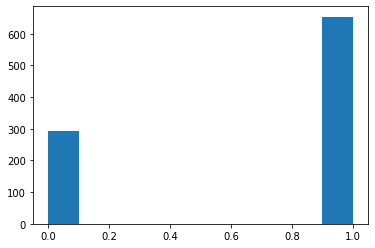

In [307]:
plt.hist(accuracy_array)
plt.show()

In [321]:
# K-Fold Cross Validation

accuracy_array = []
f1_array = []

kf = KFold(n_splits=50)
for train_index, test_index in kf.split(X):
    X_train, X_test = extract_elements(X, train_index), extract_elements(X, test_index)
    y_train, y_test = extract_elements(y, train_index), extract_elements(y, test_index)
    dv = DictVectorizer()
    train_feature_set = dv.fit_transform(X_train)
    test_feature_set = dv.transform(X_test)
    lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr.fit(train_feature_set, y_train)
    test_pred_y = lr.predict(test_feature_set)
    accuracy = accuracy_score(y_test, test_pred_y)
    f1 = f1_score(y_test, test_pred_y)
    accuracy_array.append(accuracy)
    f1_array.append(f1)


print(f"Mean Accuracy score: {round(np.mean(accuracy_array), 3)}")
print(f"Mean F1 score: {round(np.mean(f1_array), 3)}\n")
print(f"Max Accuracy score: {round(np.max(accuracy_array), 3)}")
print(f"Max F1 score: {round(np.max(f1_array), 3)}\n")

Mean Accuracy score: 0.691
Mean F1 score: 0.811

Max Accuracy score: 0.895
Max F1 score: 0.944



In [328]:
# Now, same k-fold cross validation, but predicting if ever_diagnosed
# Keep in mind that there are VERY few entries that are false here. 
print(dset.groupby('ever_diagnosed')['ever_diagnosed'].count())
dset2 = dset[pd.notna(dset['ever_diagnosed'])]
print(dset2.groupby('ever_diagnosed')['ever_diagnosed'].count())

X = list(map(feature_dict_of_entry, dset2.iterrows()))
y = [entry[1]['ever_diagnosed'].lower() == 'yes' for entry in dset2.iterrows()]

accuracy_array = []
f1_array = []

kf = KFold(n_splits=50)
for train_index, test_index in kf.split(X):
    X_train, X_test = extract_elements(X, train_index), extract_elements(X, test_index)
    y_train, y_test = extract_elements(y, train_index), extract_elements(y, test_index)
    dv = DictVectorizer()
    train_feature_set = dv.fit_transform(X_train)
    test_feature_set = dv.transform(X_test)
    lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr.fit(train_feature_set, y_train)
    test_pred_y = lr.predict(test_feature_set)
    accuracy = accuracy_score(y_test, test_pred_y)
    f1 = f1_score(y_test, test_pred_y)
    accuracy_array.append(accuracy)
    f1_array.append(f1)


print(f"Mean Accuracy score: {round(np.mean(accuracy_array), 3)}")
print(f"Mean F1 score: {round(np.mean(f1_array), 3)}\n")
print(f"Max Accuracy score: {round(np.max(accuracy_array), 3)}")
print(f"Max F1 score: {round(np.max(f1_array), 3)}\n")

ever_diagnosed
No       7
Yes    482
Name: ever_diagnosed, dtype: int64
ever_diagnosed
No       7
Yes    482
Name: ever_diagnosed, dtype: int64
Mean Accuracy score: 0.986
Mean F1 score: 0.993

Max Accuracy score: 1.0
Max F1 score: 1.0



In [393]:
dset1_imputed = pd.read_csv(data_directory / dset1_imputed_path)
dset1_imputed = dset1_imputed[pd.notna(dset1_imputed['know_resources'])]
dset1_imputed = dset1_imputed[pd.notna(dset1_imputed['gender'])]
dset1_imputed = dset1_imputed[pd.notna(dset1_imputed['race'])]
dset1_imputed.groupby('ever_diagnosed')['ever_diagnosed'].count()

ever_diagnosed
0.0      7
1.0    940
Name: ever_diagnosed, dtype: int64

In [394]:
dset2_imputed = pd.read_csv(data_directory / dset2_imputed_path)
dset2_imputed = dset2_imputed[pd.notna(dset2_imputed['know_resources'])]
dset2_imputed.groupby('ever_diagnosed')['ever_diagnosed'].count()

# For both these datasets, sought_treatment is 0, so no easy way to do any analysis on that. I will do ever_diagnosed instead
# but those are HEAVILY skewed toward yes diagnosed (3035 vs 15)

ever_diagnosed
0.0      15
1.0    1510
Name: ever_diagnosed, dtype: int64

In [401]:
def feature_dict_of_entry4(entry) -> Dict:
    # DictVectorizer automatically turns strings into one-hot encodings (so we do not have to do so for categorical variables like country).
    # Encode as ordinal
    know_resources = {
        "No, I don't know any" : 0,
        "I know some" : 1,
        "Yes, I know several" : 2
    }
    result = {
        # "age" : entry['age'],
        "country" : entry["country_live"],
        "state" : entry["state_live"] if isinstance(entry["state_live"], str) else "",
        "gender" : entry["gender"], 
        "race" : entry["race"],
        "family_history" : entry["family_history"],
        "share_with_friends_and_family" : entry["share_with_f&f"],
        "primarily_tech" : entry["primarily_tech"] if isinstance(entry["primarily_tech"], str) else "",
        "know_resources" : know_resources.get(entry["know_resources"], -1)
    }
    return result

def get_why_bring_up(entry):
    result = entry['interview_why'] 
    result = result if isinstance(result, str) else ""
    return result

X = [(feature_dict_of_entry4(entry), get_why_bring_up(entry)) for idx, entry in dset1_imputed.iterrows()]
y = [entry[1]['ever_diagnosed'] for entry in dset1_imputed.iterrows()]

TRAIN_PROPORTION = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_PROPORTION, random_state=42)
X_train_dict, X_train_text = zip(*X_train)
X_test_dict, X_test_text = zip(*X_test)

dv = DictVectorizer()
train_feature_set_dict = dv.fit_transform(X_train_dict)
test_feature_set_dict = dv.transform(X_test_dict)

cv = CountVectorizer(binary=True, min_df=0, max_df=0.98)
train_array_text = cv.fit_transform(X_train_text)
test_array_text = cv.transform(X_test_text)

train_feature_set = hstack((train_feature_set_dict, train_array_text))
test_feature_set = hstack((test_feature_set_dict, test_array_text))
lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
lr.fit(train_feature_set, y_train)
test_pred_y = lr.predict(test_feature_set)

accuracy = accuracy_score(y_test, test_pred_y)
f1 = f1_score(y_test, test_pred_y)

print(f"Accuracy score: {round(accuracy, 3)}")
print(f"F1 score: {round(f1, 3)}\n")

target_names = ["Did not Seek Treatment", "Sought Treatment"]
report = classification_report(y_test, test_pred_y, target_names=target_names)
print(report)




757 753.0
Accuracy score: 0.984
F1 score: 0.992

                        precision    recall  f1-score   support

Did not Seek Treatment       0.00      0.00      0.00         3
      Sought Treatment       0.98      1.00      0.99       187

              accuracy                           0.98       190
             macro avg       0.49      0.50      0.50       190
          weighted avg       0.97      0.98      0.98       190



In [404]:
accuracy_array = []
f1_array = []

kf = KFold(n_splits=50)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_PROPORTION, random_state=42)
    X_train_dict, X_train_text = zip(*X_train)
    X_test_dict, X_test_text = zip(*X_test)

    dv = DictVectorizer()
    train_feature_set_dict = dv.fit_transform(X_train_dict)
    test_feature_set_dict = dv.transform(X_test_dict)

    cv = CountVectorizer(binary=True, min_df=0, max_df=0.98)
    train_array_text = cv.fit_transform(X_train_text)
    test_array_text = cv.transform(X_test_text)

    train_feature_set = hstack((train_feature_set_dict, train_array_text))
    test_feature_set = hstack((test_feature_set_dict, test_array_text))
    lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr.fit(train_feature_set, y_train)
    test_pred_y = lr.predict(test_feature_set)

    accuracy = accuracy_score(y_test, test_pred_y)
    f1 = f1_score(y_test, test_pred_y)
    accuracy_array.append(accuracy)
    f1_array.append(f1)
    # X_train, X_test = extract_elements(X, train_index), extract_elements(X, test_index)
    # y_train, y_test = extract_elements(y, train_index), extract_elements(y, test_index)
    # dv = DictVectorizer()
    # train_feature_set = dv.fit_transform(X_train)
    # test_feature_set = dv.transform(X_test)
    # lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    # lr.fit(train_feature_set, y_train)
    # test_pred_y = lr.predict(test_feature_set)
    # accuracy = accuracy_score(y_test, test_pred_y)
    # f1 = f1_score(y_test, test_pred_y)
    # accuracy_array.append(accuracy)
    # f1_array.append(f1)


print(f"Mean Accuracy score: {round(np.mean(accuracy_array), 3)}")
print(f"Mean F1 score: {round(np.mean(f1_array), 3)}\n")
print(f"Max Accuracy score: {round(np.max(accuracy_array), 3)}")
print(f"Max F1 score: {round(np.max(f1_array), 3)}\n")

Mean Accuracy score: 0.984
Mean F1 score: 0.992

Max Accuracy score: 0.984
Max F1 score: 0.992



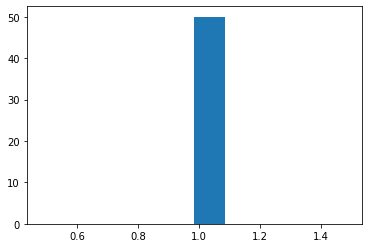

In [405]:
plt.hist(accuracy_array)
plt.show()